# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 3 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Nombres: SÁNCHEZ GÓMEZ, ALBERTO Y CARPIO CUENCA, SARA__  
__Grupo: G19__

In [1]:
RANDOM_STATE = 333

# Apartado 1: Clasificador de noticias

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no debes usarlo para clasificar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías. Indica si debemos tenerlo en cuenta de alguna forma al analizar los modelos que construyamos.

Muestra un mensaje cualquiera y explica si lo habrías clasificado en la clase correcta tras leerlo.

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

In [2]:
import pandas as pd

In [3]:
df_bbc = pd.read_csv('BBC News.csv')
df_bbc

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [4]:
df_bbc.groupby('Category').describe()

ArticleId                                                 \
                  count         mean         std   min     25%     50%   
Category                                                                 
business          336.0  1104.315476  658.063510   2.0  476.25  1107.5   
entertainment     273.0  1100.274725  615.695597  10.0  601.00  1081.0   
politics          274.0  1134.317518  637.628980   7.0  610.00  1163.0   
sport             346.0  1104.057803  649.542516   4.0  513.50  1070.0   
tech              261.0  1165.195402  643.852459  20.0  631.00  1147.0   

                                
                   75%     max  
Category                        
business       1716.25  2221.0  
entertainment  1611.00  2223.0  
politics       1681.50  2224.0  
sport          1689.50  2219.0  
tech           1755.00  2216.0

Podemos observar que la distribución de artículos en las diferentes categorías es bastante homógenea. Esto debería proporcionar buenos resultados en la clasificación de textos ya que tenemos muchos ejemplos distribuidos entre todas las categorías, facilitando que haya más palabras que se repitan entre los artículos de una misma clase.

In [5]:
df_bbc["Text"][82]

'howard pitches for uk ethnic vote michael howard is to make a pitch for britain s ethnic vote urging people who feel  taken for granted  by tony blair to vote conservative.  he will say conservatives  share the same values  as the uk s minorities. and that he wants to build a  better britain  where everyone  whatever the colour of their skin or religion  can  make the most of their talents . but the tory leader will argue against positive discrimination saying it is  outdated and unjust .   it sets family against family and it leads ethnic communities to doubt their own abilities   he will argue. mr howard - himself the son of immigrants - will acknowledge that racial discrimination still exists in the uk.  people from ethnic communities  for example  still earn less than their white counterparts   he will say before arguing the answer to helping everyone to get on was  free enterprise  free trade  free speech . the tory leader will also call for religious tolerance arguing that hindu

In [6]:
df_bbc["Category"][82]

'politics'

Leyendo el artículo, vemos que está bastante relacionado con la política Reino Unido y con unas elecciones. La categoría `politics` es acertada. 

In [7]:
df_bbc["Text"][42]

'premier league planning cole date the premier league is attempting to find a mutually convenient date to investigate allegations chelsea made an illegal approach for ashley cole.  both chelsea and arsenal will be asked to give evidence to a premier league commission  but no deadline has been put on when that meeting will convene.  it s hard to put a date on it   a premier league spokesman confirmed to bbc sport.  it s not a formal situation where they ve got so much time to respond.  arsenal and england defender cole reportedly met blues boss jose mourinho and chief executive peter kenyon in a london hotel 11 days ago. chelsea have yet to officially confirm or deny the meeting  which would be in breach of premier league rule k3.  now the gunners have asked for an inquiry to look into claims that their player has been  tapped up . both clubs have pledged to co-operate with the inquiry which will be conducted on a single day as opposed to being run as an ongoing evaluation. cole is in n

In [8]:
df_bbc["Category"][42]

'sport'

Este artículo claramente es sobre la categoría `sport`, ya que habla sobre unos problemas con un jugador y dos clubes de la Premier League.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
bbc_train, bbc_test = train_test_split(df_bbc, test_size=0.20, random_state=RANDOM_STATE)
bbc_train

,ArticleId,Text,Category
955,167,springer criticises opera musical talk show ho...,entertainment
593,2220,beijingers fume over parking fees choking traf...,business
565,1772,apple laptop is greatest gadget the apple po...,tech
64,315,two nigerian banks set to merge nigerian banks...,business
1422,159,uk firms embracing e-commerce uk firms are e...,politics
...,...,...,...
46,593,china ripe for media explosion asia is set t...,tech
1398,1436,banker loses sexism claim a former executive a...,business
1390,479,rap feud in 50 cent s g-unit crew us rap star ...,entertainment
1443,1490,unclear future for striker baros liverpool for...,sport


In [11]:
bbc_test

,ArticleId,Text,Category
741,231,tv show unites angolan families angolan famili...,entertainment
637,427,bortolami predicts dour contest italy skipper ...,sport
1298,1369,no uk apology for colonial past the days of b...,politics
316,372,us peer-to-peer pirates convicted the first co...,tech
1435,1166,relay squad thrilled with honours jason garden...,sport
...,...,...,...
1041,1011,gadget show heralds mp3 season partners of tho...,tech
404,1381,world leaders gather to face uncertainty more ...,business
1198,2166,briton wins short film oscar three of the five...,entertainment
79,1929,ukraine strikes turkmen gas deal ukraine has a...,business


In [12]:
bbc_train.groupby("Category").describe()

ArticleId                                                \
                  count         mean         std   min    25%     50%   
Category                                                                
business          263.0  1136.680608  647.030112  19.0  629.5  1124.0   
entertainment     212.0  1087.221698  634.933226  10.0  565.5  1061.0   
politics          214.0  1113.971963  635.296219   7.0  584.5  1116.5   
sport             285.0  1089.859649  634.695353   4.0  533.0  1047.0   
tech              218.0  1177.183486  648.441942  20.0  645.5  1182.5   

                                
                   75%     max  
Category                        
business       1744.00  2221.0  
entertainment  1635.25  2223.0  
politics       1641.50  2207.0  
sport          1642.00  2219.0  
tech           1757.50  2216.0

In [13]:
bbc_test.groupby("Category").describe()

ArticleId                                                  \
                  count         mean         std    min     25%     50%   
Category                                                                  
business           73.0   987.712329  688.367140    2.0  334.00   992.0   
entertainment      61.0  1145.639344  545.982479   38.0  836.00  1183.0   
politics           60.0  1206.883333  646.007296   14.0  618.75  1280.0   
sport              61.0  1170.393443  716.768984   18.0  460.00  1163.0   
tech               43.0  1104.418605  623.895108  184.0  573.50  1022.0   

                                
                   75%     max  
Category                        
business       1516.00  2186.0  
entertainment  1540.00  2212.0  
politics       1717.25  2224.0  
sport          1871.00  2173.0  
tech           1720.00  2184.0

Después de hacer la partición, vemos que la distribución sigue siendo homogénea.

## 2) Representación basada en bolsa de palabras y frecuencia de aparición

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y la frecuencia de aparición de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Entrena un clasificador Naive Bayes Multinomial y calcula su tasa de aciertos sobre el conjunto de entrenamiento y el conjunto de test. A continuación calcula los valores de precisión, exhaustividad y puntuación F1 para cada una de las clases. Dibuja la matriz de confusión. Analiza los resultados obtenidos.

A continuación, entrena un clasificador k-NN con la configuración por defecto y usando la misma vectorización. Analiza los resultados, ¿a qué crees que se deben?

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [15]:
vectorizer = CountVectorizer(stop_words='english', binary=False, ngram_range = (1,1))
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_data=vectorizer.fit_transform(bbc_train['Text'])

In [16]:
# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data=vectorizer.transform(bbc_test['Text'])

In [17]:
feature_names = vectorizer.get_feature_names()

print(len(feature_names))
print(feature_names)

22201
['00', '000', '000bn', '000m', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '033', '04', '041', '04bn', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '0630', '069', '07', '070', '0710', '072', '0730', '08', '080', '0870', '088', '09', '0900', '093', '0950', '09bn', '09secs', '10', '100', '1000th', '100bn', '100m', '100ml', '101', '102', '103', '104', '105', '105bn', '105m', '106', '107', '108', '1080', '109', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '1115', '111m', '112', '113', '1130', '1130p', '113bn', '115', '116', '116i', '117', '117m', '118', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120gb', '120m', '121', '1215', '1230', '125', '125m', '126', '127th', '128', '12a', '12bn', '12cm', '12m', '12th', '13', '130', '1300', '130m', '132', '133', '1337', '134', '135', '136', '137', '138m', '139', '13bn', '13m', '13s', '13s

Vemos que hay aproximadamente 22000 palabras. Como podíamos esperar, vemos que hay varias cadenas que son numeros o que mezclan números y letras, pero la gran mayoría son palabras.

In [18]:
print(train_vector_data[100])

  (0, 17445)	5
  (0, 20701)	12
  (0, 9157)	1
  (0, 3453)	3
  (0, 7735)	3
  (0, 5674)	1
  (0, 686)	1
  (0, 13765)	1
  (0, 13989)	2
  (0, 21598)	1
  (0, 7682)	1
  (0, 6977)	1
  (0, 16320)	1
  (0, 17933)	1
  (0, 12249)	1
  (0, 13436)	1
  (0, 367)	3
  (0, 2058)	1
  (0, 10941)	1
  (0, 10497)	2
  (0, 9200)	2
  (0, 1274)	1
  (0, 10846)	1
  (0, 20377)	1
  (0, 9936)	1
  :	:
  (0, 11428)	1
  (0, 11570)	1
  (0, 15402)	1
  (0, 10531)	1
  (0, 12014)	2
  (0, 11035)	1
  (0, 17489)	1
  (0, 9852)	1
  (0, 3576)	1
  (0, 1033)	1
  (0, 21228)	1
  (0, 6800)	1
  (0, 3752)	1
  (0, 7318)	1
  (0, 19232)	1
  (0, 16908)	1
  (0, 14664)	1
  (0, 3418)	1
  (0, 8178)	1
  (0, 2898)	1
  (0, 10561)	1
  (0, 8204)	1
  (0, 19363)	1
  (0, 707)	1
  (0, 17806)	1


In [19]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [20]:
write_terms(feature_names, bbc_train['Text'].values, train_vector_data, 10)

Mensaje 10 : foxx and swank take actors awards jamie foxx and hilary swank have won the screen actors guild awards for best male and female film actors  boosting their oscars hopes this month.  foxx s portrayal of late soul-singer ray charles in ray had already earned him a prestigious golden globe award. swank triumphed for playing a gutsy female boxer in million dollar baby. modest wine country comedy sideways knocked out favourites million dollar baby and the aviator by taking the top prize for best cast performance.  the screen actors guild (sag) represents us film and tv actors. its winners often go on to win oscars. in other nominations  cate blanchett triumphed as the best supporting actress for her role as katharine hepburn in the aviator. veteran actor morgan freeman took the best supporting actor award for playing a prize-fighter turned gym manager in million dollar baby.   thank you for ray charles for just living so complex and so interesting  and making us all just come to

In [21]:
write_terms(feature_names, bbc_train['Text'].values, train_vector_data, 100)

Mensaje 100 : film production  falls  40% in uk the number of british films produced in the uk fell 40% in 2004  with movies starring johnny depp and jude law among those affected  screen daily has said.  twenty-seven british films were made in the uk last year following a drop in funding  compared with 45 in 2003  according to the trade weekly. it attributed the drop to tighter tax laws and reduced funding from sources such as the national lottery. uk and us co-productions in britain fell from 102 in 2003 to 81 last year.  last year the government closed tax loopholes that many film investors had taken advantage of to fund films in the uk. several projects were shelved as they faced the implications of this clampdown  coupled with the reduction in movie funding from traditional sources including the lottery and miramax films. shooting on period drama tulip fever  which was to star jude law and keira knightley  was postponed indefinitely while shooting of the libertine starring johnny 

En cada mensaje podemos observar que la lista de palabras del mensaje vectorizado es menor que la lista de palabras que aparecen en el mensaje original. Esto se debe a que se han eliminado todas las `stop-words` que le indicamos al vectorizador cuando le creamos.

___Naive-Bayes___

In [22]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_vector_data, bbc_train['Category'])

mnb_train_predictions = mnb_classifier.predict(train_vector_data)
mnb_test_predictions = mnb_classifier.predict(test_vector_data)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == bbc_train['Category'].values))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == bbc_test['Category'].values))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9966442953020134
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.9798657718120806


Como era de esperar, el porcentaje de acierto en test es menor que en el de entrenamiento, pero aun así, es un porcentaje muy alto en ambos. Esto indica que el entrenamiento ha sido satisfactorio y no ha sobreaprendido, ya que el porcentaje del test es similar al de entrenamiento.

Parece que tenemos un clasificador muy bueno.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# NOTA: Aquí elegimos analizar un determinado clasificador y sus predicciones 
# Por ejemplo el naive bayes
classifier  = mnb_classifier
predictions = mnb_test_predictions

print(classification_report(bbc_test['Category'], predictions, target_names= np.unique(bbc_test['Category'].values)))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97        73
entertainment       1.00      0.97      0.98        61
     politics       0.95      0.98      0.97        60
        sport       1.00      0.98      0.99        61
         tech       0.98      1.00      0.99        43

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



La precisión nos indica que si todos los documentos que nos recupera de una cierta categoría, realmente pertenecen a esa categoría. En todas las categorías, observamos que la precisión ronda alrededor de 0.98, lo cual es un valor muy alto. Esto nos indica que el clasificador ha sido capaz de encontrar rasgos distintivos con los que poder diferenciar los textos.

El recall nos indica el porcentaje de documentos que se recuperan de una cierta categoría. De nuevo, el valor medio del recall es 0.98, un valor muy alto. Esto nos indica que los textos se confunden poco entre sí, y el clasificador rara vez le asigna a un documento una categoría que no le corresponde.

El F1 es la media armónica entre la precisión y la exhaustividad. Una vez más, el valor medio es 0.98. Al ser los valores de precisión y exhaustividad muy altos, el F1 también lo va a ser.

##### Confusion Matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'business'),
  Text(1.5, 0, 'entertainment'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'sport'),
  Text(4.5, 0, 'tech')])

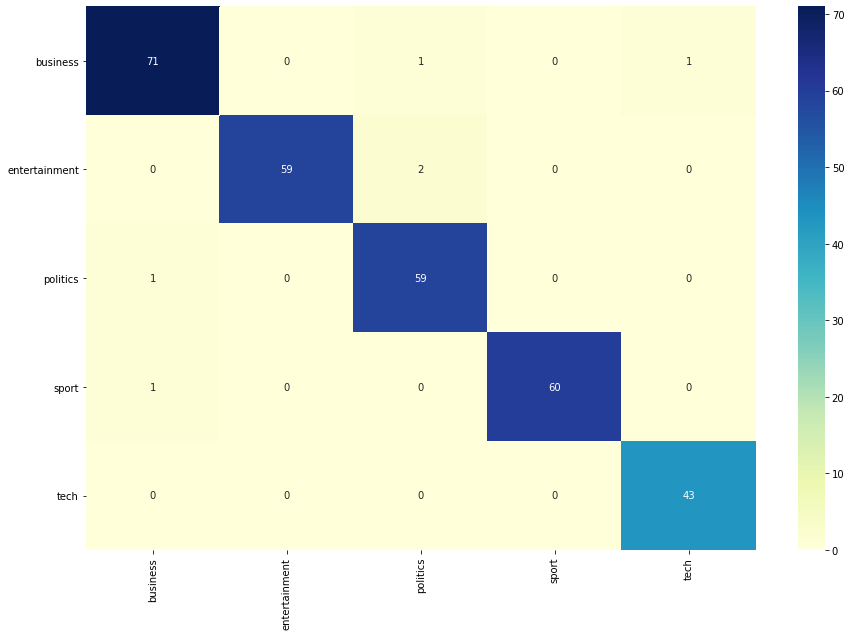

In [24]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(bbc_test['Category'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(bbc_test['Category'].values), columns=np.unique(bbc_test['Category'].values))

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Como ya habíamos visto, tenemos un clasificador que confunde muy poco las noticias. Vemos que la diagonal de la matriz está muy poblada, con la mayoría de los textos clasificados correctamente. En cuanto al resto, prácticamente no hay confusiones, salvo 6 textos de casi 300 que hay en total. La mayor confusión que presenta el clasificador (que solo son 2) son los textos de `politics`, que los clasifica como `entertainment`.

##### k-NN

In [25]:
from sklearn import neighbors

knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(train_vector_data, bbc_train['Category'])

knn_train_predictions = knn_classifier.predict(train_vector_data)
knn_test_predictions = knn_classifier.predict(test_vector_data)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions == bbc_train['Category'].values))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions == bbc_test['Category'].values))

k-NN, porcentaje de aciertos en entrenamiento: 0.6786912751677853
k-NN, porcentaje de aciertos en test: 0.5704697986577181


Al estár usando los parámetros por defecto es probable que podamos ajustarlo para que nos devuelva mejorar porcentajes, ya que son bastante bajos.

Aun así, podemos decir que esto se debe a que el clasificador k-NN sufre de la maldición de dimensionalidad e intenta buscar vecinos en un espacio de dimensiones muy elevado y poco poblado. (en nuestro caso, 22201 dimensiones). Por esto, este clasificador no es una técnica adecuada para estos casos.

## 3) Representación basada en word-embeddings

La segunda vectorización que vamos a usar representará los mensajes usando word-embeddings. Cada documento se representará como el vector que resulta de promediar los embeddings de cada una de sus palabras. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings. 

Entrena un clasificador Naive Bayes Gaussiano (el Multinomial no admite valores negativos que sí aparecen en los embeddings). Analiza el error por clase y dibuja la matriz de confusión.

Entrena otro clasificador kNN con la nueva vectorización y la configuración por defecto y analiza su error.

In [26]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Traducimos el fichero glove a un fichero con formato word2vec
glove_file = 'glove.6B.50d.txt'

# Gensim 4 puede transformar de glove a word2vec directamente
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [27]:
we_vocabulary = list(model.key_to_index.keys())

In [28]:
vectorizer_emb = CountVectorizer(vocabulary = we_vocabulary, stop_words='english', binary=False, ngram_range = (1,1))

In [29]:
train_vector_data_emb = vectorizer_emb.fit_transform(bbc_train['Text'])

In [30]:
# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data_emb = vectorizer_emb.transform(bbc_test['Text'])

##### GaussianNB

Vamos a usar un `chunk_size` de exactamente de 149. Hemos escogido este tamaño para que cuando haga la división en los diferentes chunks no deje ningún texto fuera.

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()

chunk_size=149
num_rows=len(bbc_train['Category'])

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_vector_data_emb[i*chunk_size : (i+1)*chunk_size,:].toarray()
    target_chunk = bbc_train['Category'][i*chunk_size : (i+1)*chunk_size]
    gnb_classifier.partial_fit(train_chunk, target_chunk, classes=np.unique(bbc_train['Category'].values))

In [32]:
# Creamos los arrays antes para ser más eficiente (crea el array grande y luego lo rellena)
gnb_train_predictions=np.zeros_like(bbc_train['Category'].values)
gnb_test_predictions=np.zeros_like(bbc_test['Category'].values)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_vector_data_emb[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_train_predictions[i*chunk_size : (i+1)*chunk_size] = gnb_classifier.predict(train_chunk)
    
num_rows=len(bbc_test['Category'])
for i in range(0, (num_rows//chunk_size)):
    test_chunk = test_vector_data_emb[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_test_predictions[i*chunk_size : (i+1)*chunk_size] = gnb_classifier.predict(test_chunk)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictions == bbc_train['Category'].values))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictions == bbc_test['Category'].values))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 1.0
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.8993288590604027


<AxesSubplot:ylabel='Density'>

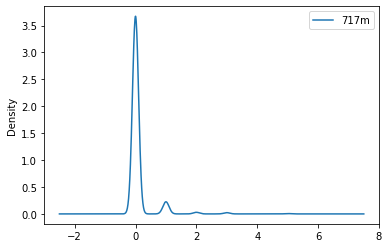

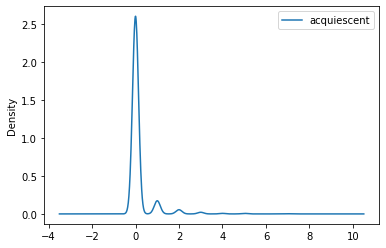

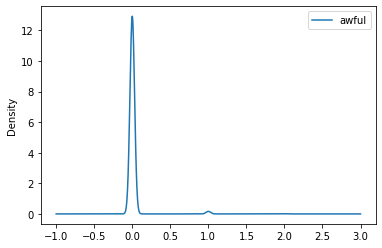

In [33]:
import pandas as pd

term=pd.DataFrame(data= train_vector_data_emb[:,865].toarray(), columns=[feature_names[865]])
term.plot.density()

term=pd.DataFrame(data= train_vector_data_emb[:,1215].toarray(), columns=[feature_names[1215]])
term.plot.density()

term=pd.DataFrame(data= train_vector_data_emb[:,2385].toarray(), columns=[feature_names[2385]])
term.plot.density()

Observamos que este clasificador da unos porcentajes de aciertos bastante altos. Aunque tampoco podemos fiarnos mucho de este clasificador, ya que los valores que tienen los términos en los documentos no siguen una distribución normal, si no que asimétricas hacia la derecha, como podemos ver en las gráficas.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# NOTA: Aquí elegimos analizar un determinado clasificador y sus predicciones 
# Por ejemplo el naive bayes
classifier_emb=gnb_classifier
predictions_emb = gnb_test_predictions

print(classification_report(bbc_test['Category'], predictions_emb, target_names= np.unique(bbc_test['Category'].values)))

               precision    recall  f1-score   support

     business       0.90      0.86      0.88        73
entertainment       0.90      0.87      0.88        61
     politics       0.90      0.87      0.88        60
        sport       0.97      0.98      0.98        61
         tech       0.82      0.93      0.87        43

     accuracy                           0.90       298
    macro avg       0.90      0.90      0.90       298
 weighted avg       0.90      0.90      0.90       298



Observando la tabla, vemos que la categoría `sport` es la que mayor tasa de aciertos tiene, mientras que las otras más o menos tienen los mismos valores. Aun así los resultados no son igual de buenos que con el otro vectorizador que usamos, ya que el Naive Gaussiano, al no seguir los valores una distribución normal, no es un buen clasificador.

##### Confusion Matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'business'),
  Text(1.5, 0, 'entertainment'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'sport'),
  Text(4.5, 0, 'tech')])

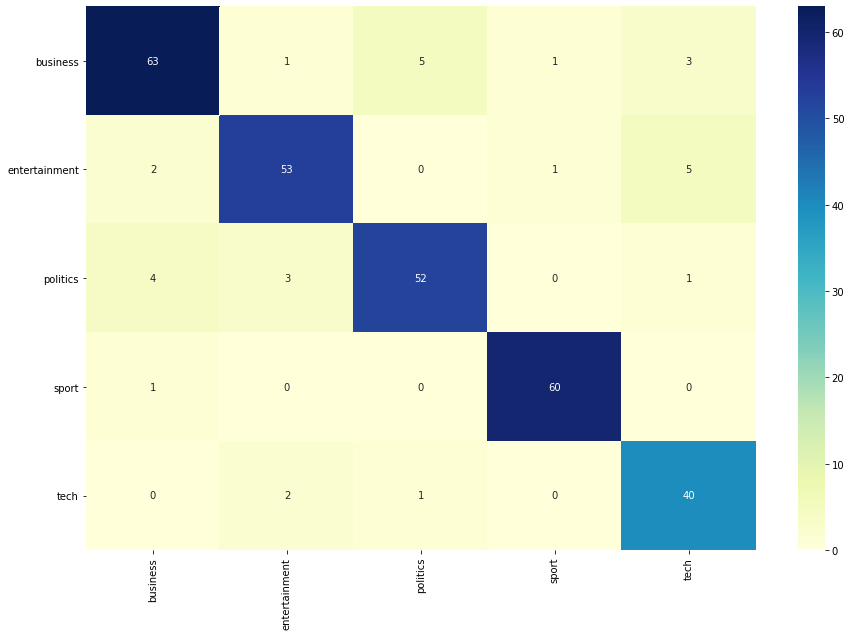

In [35]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix_emb = confusion_matrix(bbc_test['Category'], predictions_emb)
conf_matrix_df_emb = pd.DataFrame(conf_matrix_emb, index=np.unique(bbc_test['Category'].values), columns=np.unique(bbc_test['Category'].values))

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df_emb, annot=True, vmin=0, vmax=conf_matrix_emb.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Como habíamos visto, el número de textos que confunde este clasificador es mayor que los del anterior. Vemos que las clases que más confunde son `politics` con `business`, `entertainment` con `tech` y `business` con `tech`.

##### k-NN

In [36]:
from sklearn import neighbors

knn_classifier_emb = neighbors.KNeighborsClassifier()
knn_classifier_emb.fit(train_vector_data_emb, bbc_train['Category'])

knn_train_predictions_emb = knn_classifier_emb.predict(train_vector_data_emb)
knn_test_predictions_emb = knn_classifier_emb.predict(test_vector_data_emb)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions_emb == bbc_train['Category'].values))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions_emb == bbc_test['Category'].values))

k-NN, porcentaje de aciertos en entrenamiento: 0.6845637583892618
k-NN, porcentaje de aciertos en test: 0.5771812080536913


Vemos que los resultados de este k-NN son muy parecidos a los que obtenimos con el primer vectorizador con el k-NN. Podemos decir lo mismo que en el primer vectorizador: este clasificador no es bueno en este caso, ya que sufre de maldición de dimesionalidad.

## 4) Análisis comparativo final

Hemos entrenado dos clasificadores usando dos vectorizaciones diferentes de los datos. Compara la tasa de acierto de todos ellos y explica a qué crees que se deben las diferencias.

Busca un mensaje mal clasificado por el Naive Bayes con vectorización de frecuencias y otro mal clasificado por el k-NN con Word-embeddings. Analiza los vectores de términos de dichos mensajes e intenta razonar por qué ha sido clasificado erróneamente.

Para el Naive Bayes con vectorización de frecuencias, elige dos clases donde el clasificador no haya funcionado bien y analiza las palabras más relevantes para clasificar una noticia como de dichas clases. Razona si lo que ves crees que influye en la posible confusión a la hora de clasificar entre dichas clases.

In [37]:
mnb_test_predictions != bbc_test['Category'].values

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [38]:
mnb_test_predictions[0]

'politics'

In [39]:
bbc_test['Category'].values[0]

'entertainment'

In [40]:
bbc_test['Text'].values[0]

'tv show unites angolan families angolan families who are attempting to track each other down  after being separated by nearly 30 years of war  are succeeding thanks to a hugely popular tv show.  meeting point has become one of tv angola s most watched programmes  and has reunited hundreds of families. it runs daily  not only on the television but also on the radio. every friday  hundreds of people gather in luanda s independence square to record a message in front of the tv cameras  in the hope that a lost relative will see it. many relatives have been reunited on air.  at the beginning there was an absolute explosion - huge  huge crowds   sergio gera  the programme s chief co-ordinator  told bbc world service s assignment programme.  now things are a little calmer  there are slightly less people - but  after two and a half years of broadcasting  there are still a lot of people going.   the media in the southern african country  twice the size of france  has been gripped by the quest 

Este texto es un texto de `entretenimiento`, pero el Naive Bayes lo ha clasificado como `politics`. Esto es entendible ya que el texto trata sobre un programa de televisión en el que se habla sobre una guerra y sus consecuencias.

In [41]:
write_terms(feature_names, bbc_test['Text'].values, test_vector_data, 0)

Mensaje 0 : tv show unites angolan families angolan families who are attempting to track each other down  after being separated by nearly 30 years of war  are succeeding thanks to a hugely popular tv show.  meeting point has become one of tv angola s most watched programmes  and has reunited hundreds of families. it runs daily  not only on the television but also on the radio. every friday  hundreds of people gather in luanda s independence square to record a message in front of the tv cameras  in the hope that a lost relative will see it. many relatives have been reunited on air.  at the beginning there was an absolute explosion - huge  huge crowds   sergio gera  the programme s chief co-ordinator  told bbc world service s assignment programme.  now things are a little calmer  there are slightly less people - but  after two and a half years of broadcasting  there are still a lot of people going.   the media in the southern african country  twice the size of france  has been gripped by

En el mensaje vectorizado vemos palabras como independence, democracy, war, community, poorest o political. Estas palabras son claramente pertenecietes al tema de `politics`.

In [42]:
knn_test_predictions_emb != bbc_test['Category'].values

array([ True, False, False,  True, False, False, False, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
        True,  True,

In [43]:
write_terms(vectorizer_emb.get_feature_names(), bbc_test['Text'].values, test_vector_data_emb, 11)

Mensaje 11 : us airways staff agree to pay cut a union representing 5 200 flight attendants at bankrupt us airways have agreed to a new contract that cuts pay by nearly 10%.  the deal will help the carrier  trying to survive by cutting costs by nearly $1bn (£530m) a year  save about $94m. more than two thirds of its 28 000 staff have now accepted wage cuts. but talks are still continuing with a union representing mechanics  baggage handlers and cleaners  which has so far failed to negotiate a new contract. the seventh largest carrier in the us sought bankruptcy protection for a second time in two years last september. it had been one of the quickest to deal with difficulties faced by the aviation industry after the 9/11 attacks in 2001. but it emerged from chapter 11 bankruptcy in march 2003 to face competition from low-cost carriers and higher fuel costs. us airways management has said it may need to start liquidating assets if it does not receive concessions from all staff by the mid

In [44]:
bbc_test['Category'].values[11]

'business'

In [45]:
knn_test_predictions_emb[11]

'sport'

Vemos que este texto es realmente es de la categoría `business`, mientras que el clasificador lo clasifica como `sport`. Podemos suponer que esta confusión se puede deber a palabras presentes en el texto como: attacks, middle, management, competition, contract o carriers.

Podemos pensar que lo ha confundido por palabras como controller, demo, broadcasts, digital, electronic o legacy.

In [46]:
def print_top20_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    print("Top 20 features per class\n")
    for i, class_label in enumerate(class_labels):
        top20 = np.argsort(clf.feature_log_prob_[i])[-20:]
        reversed_top = top20[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [47]:
print_top20_features_per_class_in_NB(vectorizer,mnb_classifier,np.unique(bbc_test['Category'].values))

Top 20 features per class

business: said / year / mr / market / new / growth / firm / economy / company / government / bank / economic / 2004 / oil / sales / 000 / years / shares / world / prices 

entertainment: said / film / best / year / music / new / uk / awards / number / star / films / band / tv / award / won / actor / mr / director / chart / including 

politics: said / mr / labour / government / blair / election / people / party / minister / uk / new / brown / told / public / prime / plans / howard / britain / secretary / say 

sport: said / game / year / england / win / time / world / team / players / play / cup / new / second / half / ireland / just / won / final / good / match 

tech: said / people / new / mr / mobile / technology / software / users / use / games / net / year / music / digital / phone / like / make / service / computer / microsoft 



Vemos que `said` es la palabra más frecuente en todas las categorías. Esta es una palabra que va a conllevar a errores de clasificación, ya que es una palabra que no contiene un significado que la asocie a una categoría concreta.

Dos clases que se confunden más que las demás son `entertainment` y `politics`.
En cuanto a entertainment: said, best, year, new, uk, number, including. Estás palabras no están nada relacionadas con la temática de entretenimiento. Estas palabras pueden afectar en aquellos documentos que el clasificador ha confundido.
En cuanto a politics: said, party, new o say.

Mr. es una palabra que vemos que aparece en ambas categorías en el top 10, por lo que podría ser una de las razones que estas dos clases se confundan.
Said es una palabra que no tiene ningún tipo de relación con ninguna clase. Su aparición puede confundir al clasificador cuando no debería.
2004 0 000 aparecen en business, y de nuevo puede hacer que se confunda esta clase, ya que una fecha concreta o un número no implica que pertenezca a una clase concreta.

Estas palabras, como: uk, party, plans o said, pueden hacer que en algunos casos se confundan estas categorías.